# Single Cell Sequencing: data analysis I standard


We run standard single cells sequencing analysis in this notebook. Input is adata matrix that has been quality controled and that contains information about stimuli, fluorecence leves and cell id in the plate, and output is adata with pc and umap projections.

In [24]:
!pip install --quiet anndata
import os
import config as general_paths
import numpy as np
import pandas as pd
import scanpy as sc
import scipy
import anndata as ad
from sklearn.decomposition import TruncatedSVD
import matplotlib
import matplotlib.pyplot as plt
#doublet detection
import scrublet as scr
#batch correction (not installed by default in the docker container, install via command line: pip install scanorama bbknn)
import scanorama as scan
#external modules
import scanpy.external as sce
#pretty plotting
import seaborn as sb
import sys 
sb.set_context(context='poster')
from matplotlib import rcParams
from datetime import date
today = date.today()

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


scanpy==1.9.4 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.3 louvain==0.8.0 pynndescent==0.5.10


In [25]:
figure_path = general_paths.figures_path
data_path = general_paths.data_path
output_path = general_paths.output_path
input_path = output_path
local_path = general_paths.local_path

## SECTION I: Data loading
Loading adata information that has been agregated and quality controled

In [26]:
adata = ad.read_h5ad(os.path.join(input_path , 'campari_scs.h5ad'))
adata_all = ad.read_h5ad(os.path.join(input_path , 'campari_scs_all_genes.h5ad'))

print(adata.shape)
#print(adata.var_names)
#adata.obs_names_make_unique()
#adata.var_names_make_unique()


(1012, 15000)


/home/melma31/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/melma31/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/melma31/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1838: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/home/melma31/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


## SECTION II: Analysis 

### Subseccion I: pca and umap projection 

Here we run normalization, pca and umap with different parameters for exploration.

A priori we are running pca with multiple number of componentes and later we visualy select the number that better 
fits our criteria.


computing PCA
    on highly variable genes
    with n_comps=2


/home/melma31/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 2
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


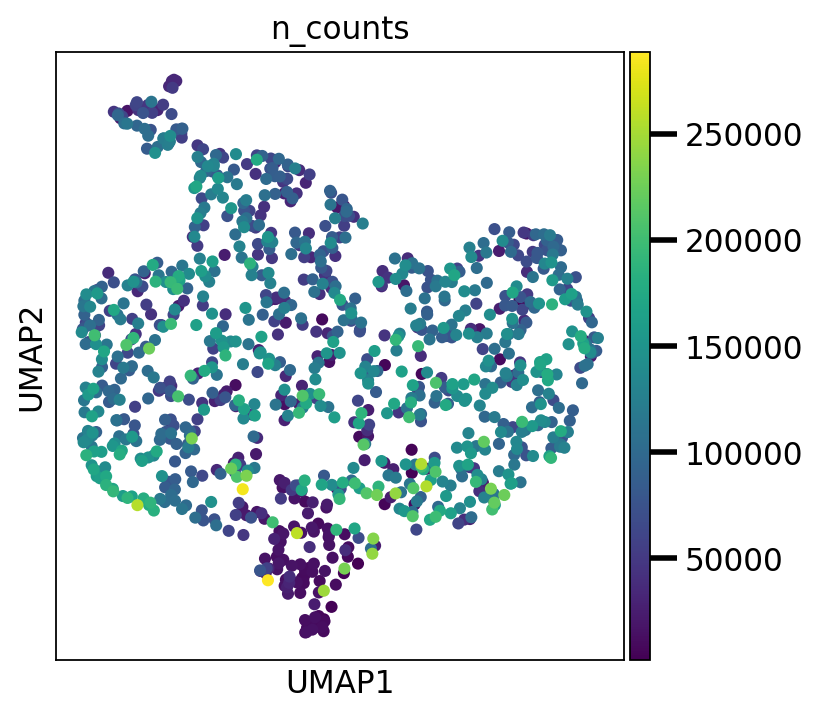

In [27]:
N_components = 3
rcParams['figure.figsize']=(5,5)

for n in range(2,N_components):
    sc.pp.pca(adata, n_comps=n, use_highly_variable=True, svd_solver='arpack')
#    sc.pp.pca(adata, n_comps=n, svd_solver='arpack')
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)
    sc.pl.umap(adata, color='n_counts', save = 'UMIs/pc_componets/pc_seurat_'+ str(n) + '.png')

In [28]:
### Dimentionality reduction examples using multiple techniques
### Select one number of componets, for example n = 15 and do louvain in the umap transformation 
# with that number of componets
N_selected = 15
sc.pp.pca(adata, n_comps=N_selected, use_highly_variable=True, svd_solver='arpack')
#sc.pp.pca(adata, n_comps=N_selected, svd_solver='arpack')

#sc.pl.pca_variance_ratio(adata)
sc.pp.neighbors(adata)
sc.tl.tsne(adata)
sc.tl.umap(adata)
#sc.tl.diffmap(adata)
#sc.tl.draw_graph(adata)

computing PCA
    on highly variable genes
    with n_comps=15


/home/melma31/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 15
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing tSNE
    using 'X_pca' with n_pcs = 15
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm) (0:00:01)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):


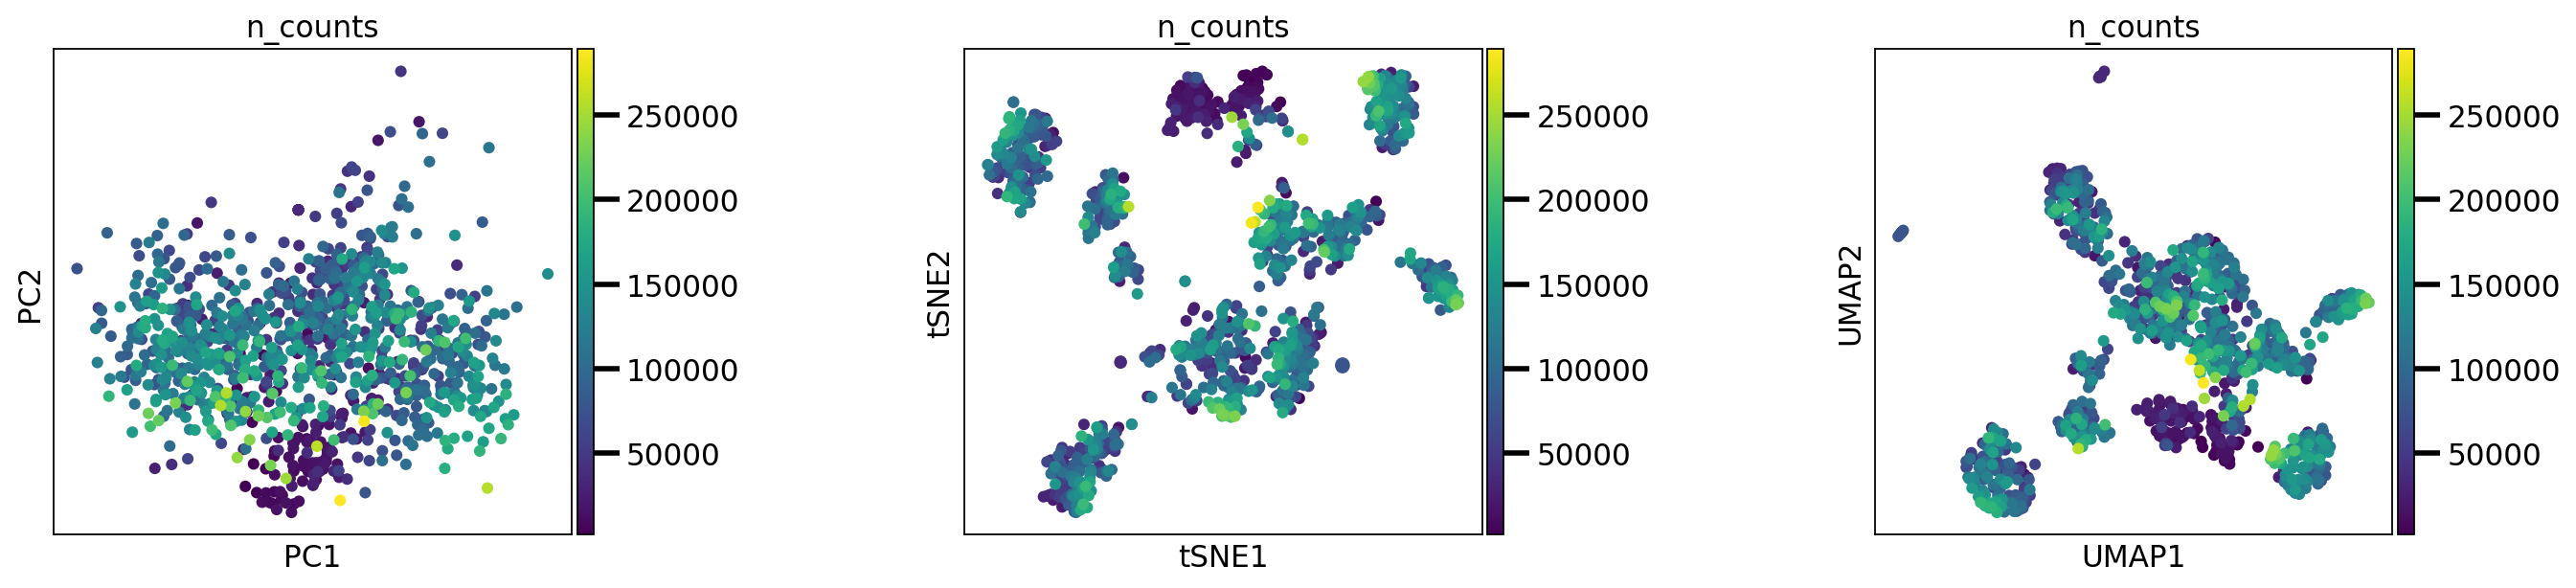

In [29]:
from matplotlib import rcParams

rcParams['figure.figsize']=(20,10)
fig_ind=np.arange(231, 237)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p10 = sc.pl.pca_scatter(adata, color='n_counts', ax=fig.add_subplot(fig_ind[0]), show=False)
p11 = sc.pl.tsne(adata, color='n_counts', ax=fig.add_subplot(fig_ind[1]), show=False)
p12 = sc.pl.umap(adata, color='n_counts', ax=fig.add_subplot(fig_ind[2]), show=False)
#p13 = sc.pl.diffmap(adata, color='n_counts', components=['1,2'], ax=fig.add_subplot(fig_ind[3]),show=False)
#p14 = sc.pl.diffmap(adata, color='n_counts', components=['1,3'], ax=fig.add_subplot(fig_ind[4]), show=False)
#p15 = sc.pl.draw_graph(adata, color='n_counts', ax=fig.add_subplot(fig_ind[5]), show=False)

plt.show()

In [30]:
adata

AnnData object with n_obs × n_vars = 1012 × 15000
    obs: 'stimulus', 'red', 'green', 'well_id', 'cell_id', 'batch', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'fraction_mito'
    var: 'gene_name', 'gene_id', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'pca', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [31]:
# Perform clustering - using highly variable genes ### maybe change to Leiden
louvain_paramenters = [0.3,0.5,1,1.5,2,2.5,3,3.5,4,4.5,6]
louvain_names = []
for value in louvain_paramenters:
    louvain_names.append('louvain_r' + str(value))

for value,name in zip(louvain_paramenters,louvain_names):
    sc.tl.louvain(adata, resolution=value, key_added=name)
    

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain_r0.3', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain_r0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 13 clusters and added
    'louvain_r1', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 14 clusters and added
    'louvain_r1.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 16 clusters and added
    'louvain_r2', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain"

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


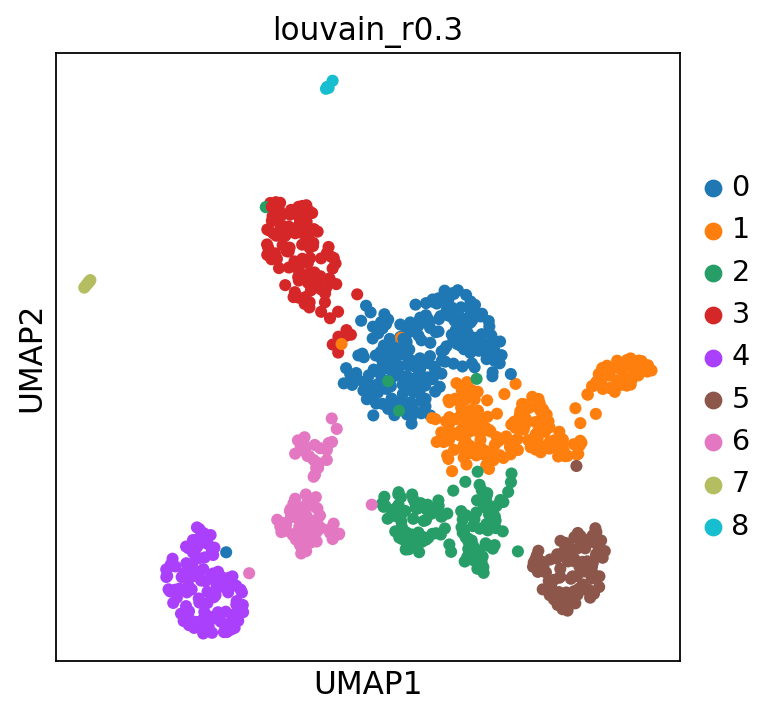

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


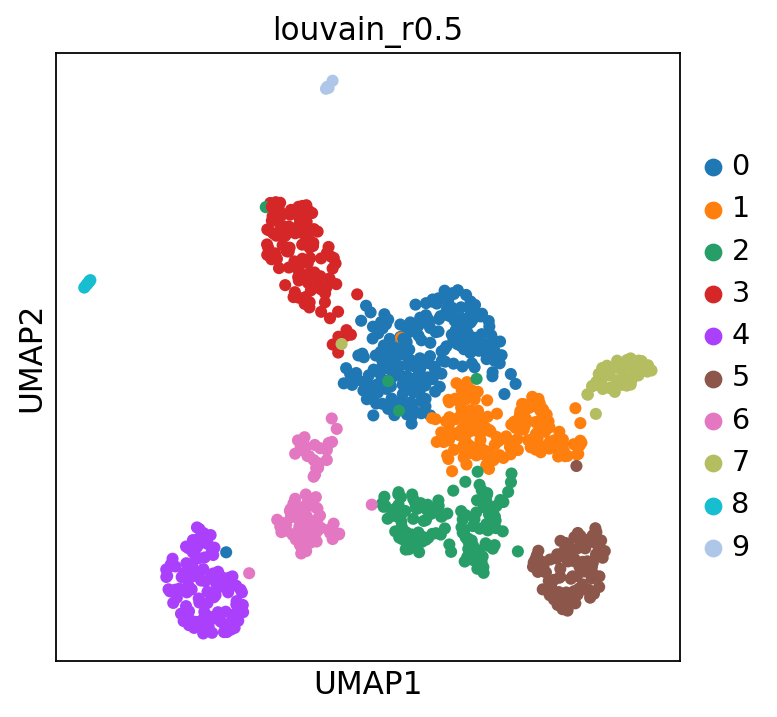

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


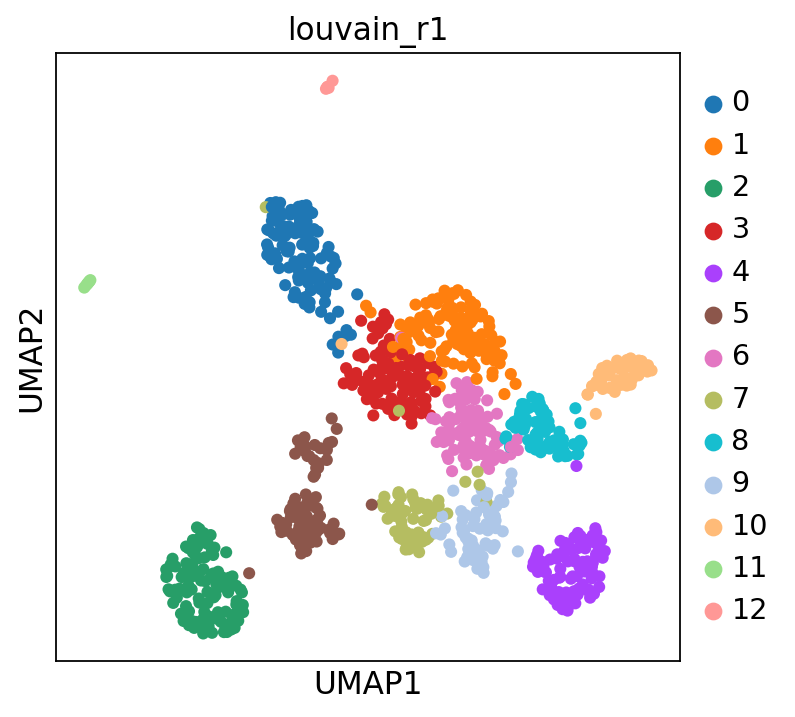

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


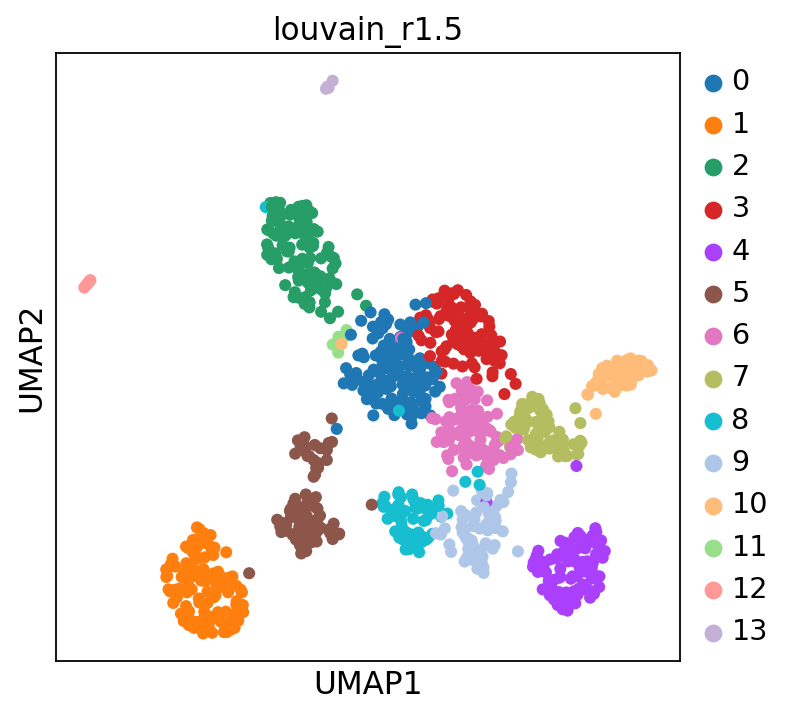

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


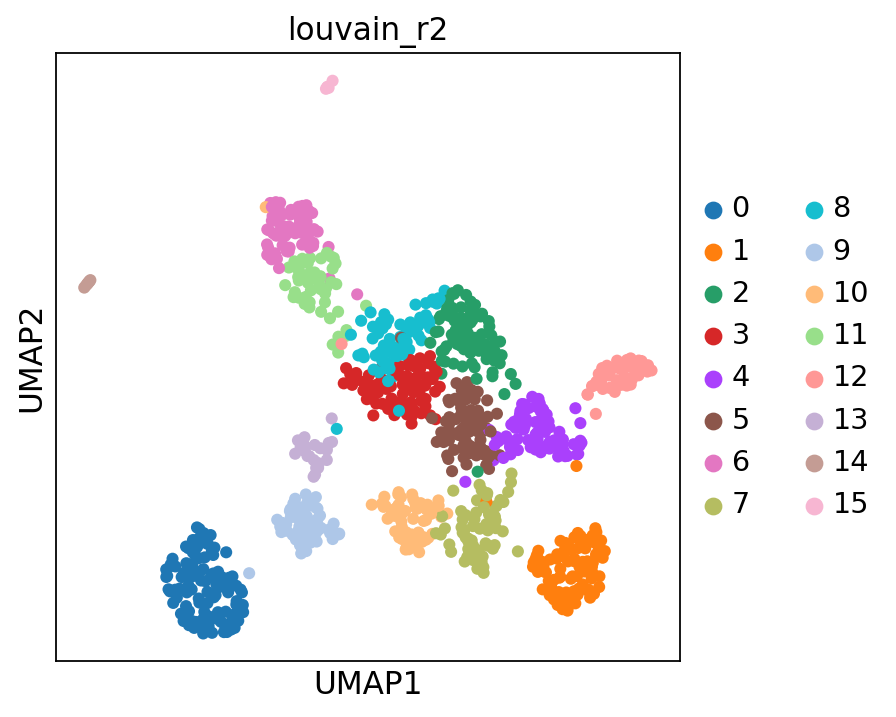

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


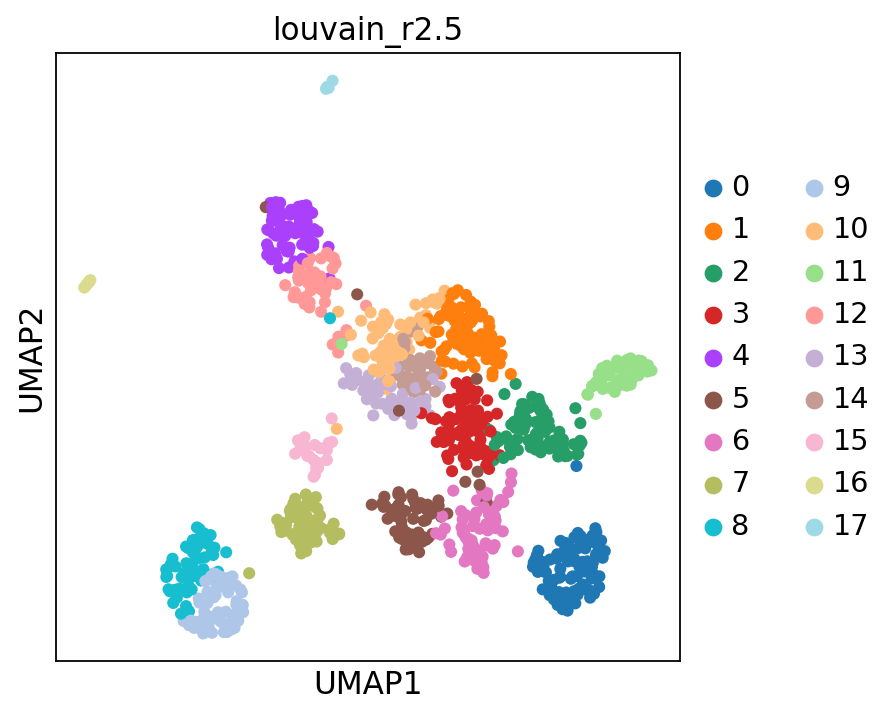

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


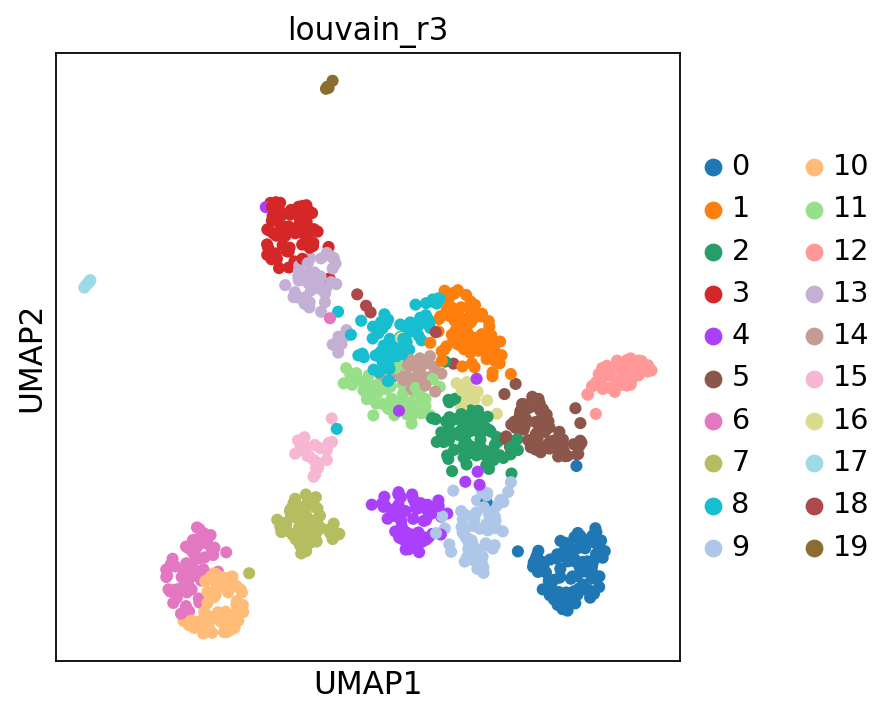

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


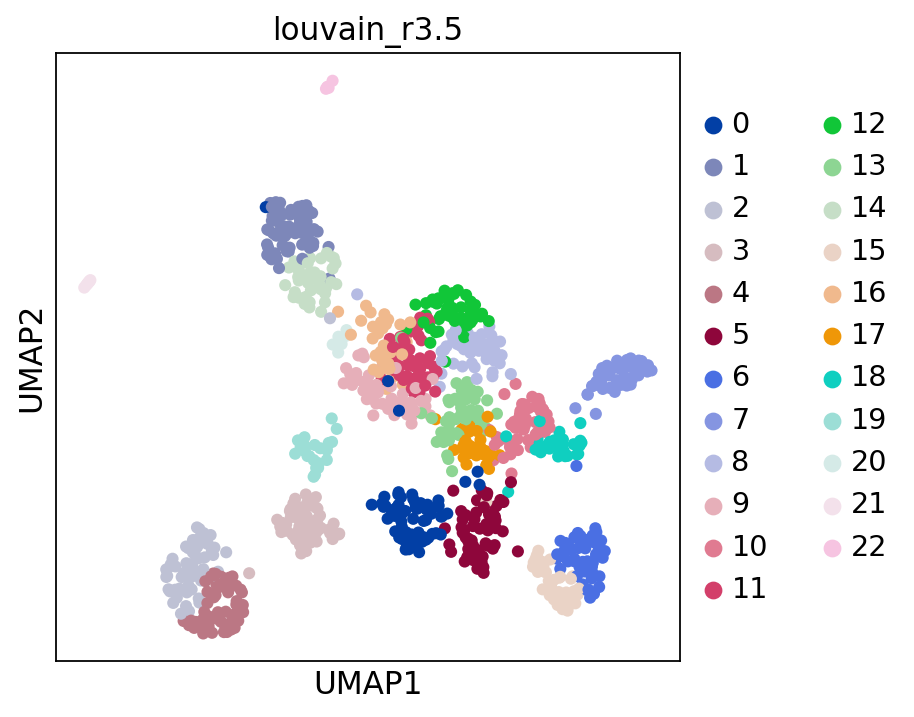

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


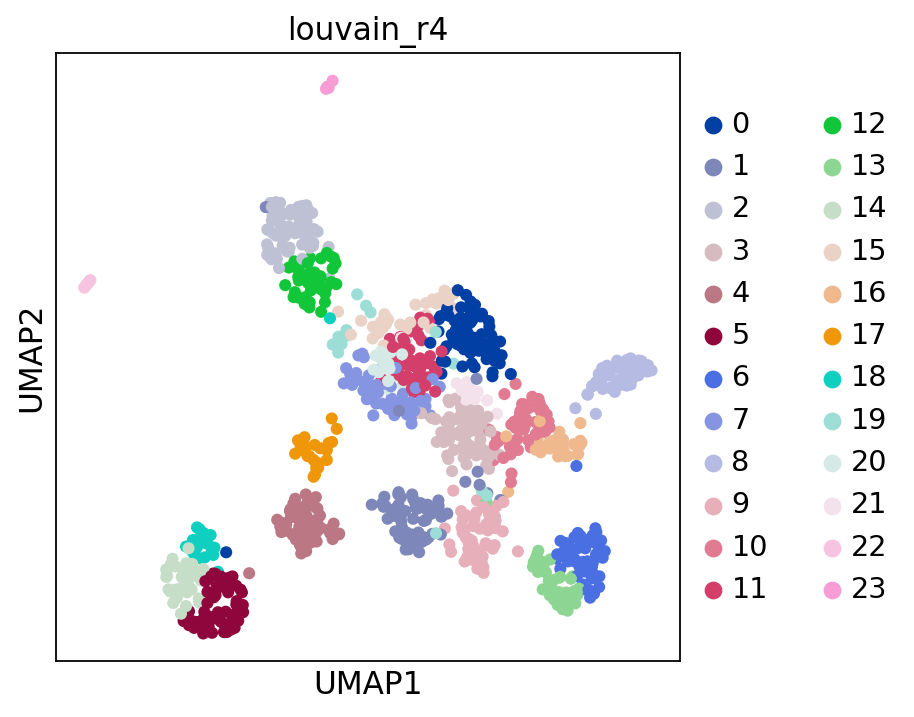

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


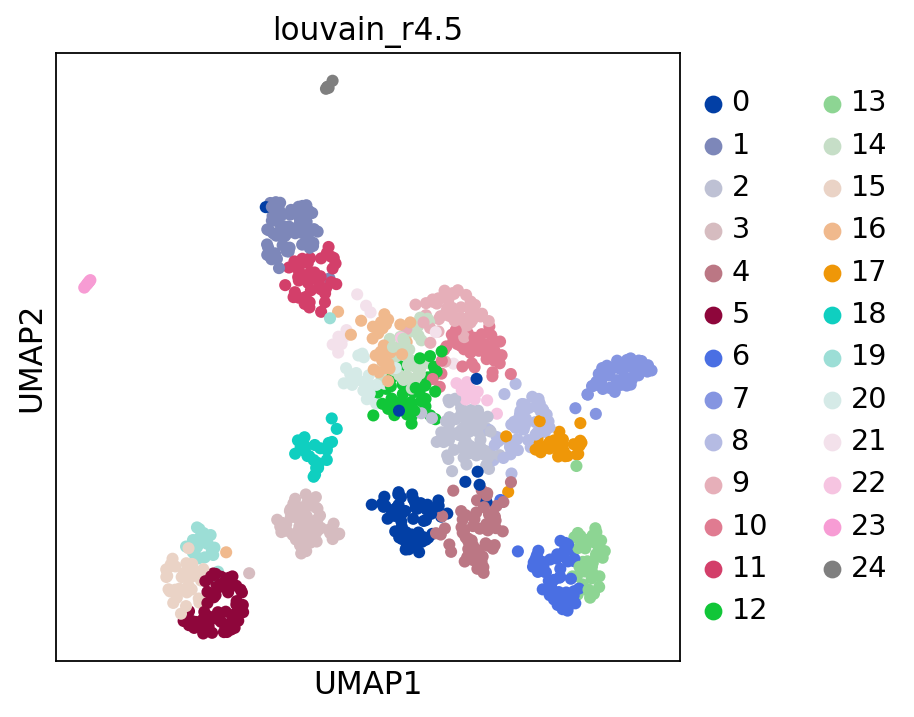

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1207: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(values):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:1216: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


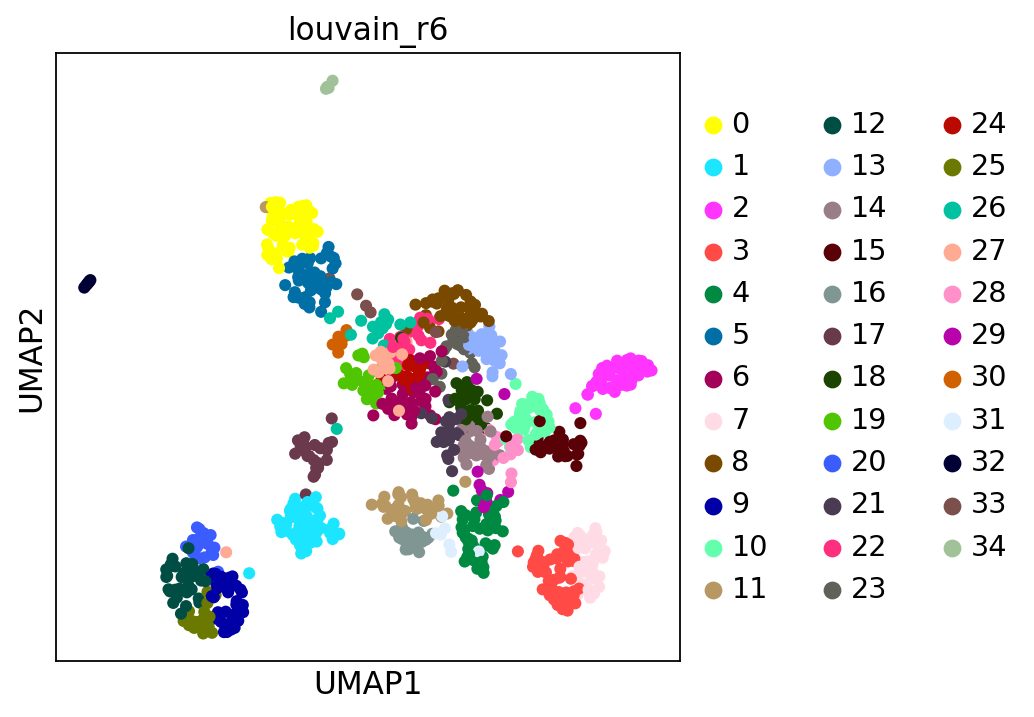

In [32]:
rcParams['figure.figsize']=(5,5)

#Visualize the clustering and how this is reflected by different technical covariates
for name in louvain_names:
    sc.pl.umap(adata, color=name, save = 'UMIs/louvain/'+name + '.png')
#sc.pl.umap(adata, color=['log_counts','stimuli'])

In [33]:
sc.tl.rank_genes_groups(adata, 'louvain_r2.5', method='wilcoxon')
rank_genes_df = pd.DataFrame(adata.uns['rank_genes_groups']['names']).head(20)

ranking genes


/home/melma31/mambaforge/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:01)


/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/melm

In [34]:
rank_genes_df

0              1        2              3              4  \
0    Tbx3os2          Negr1    P2rx6          Asic3         Gm7271   
1      Ntrk2          Pcsk1     Nefm          Cgnl1       Tmem132e   
2   Baiap2l1          Mrap2    Cabp7          Abcg2         Rnf112   
3     Cadps2           Esr1     Lgi3          Cplx2        Rarres1   
4       Rom1           Ache     Pcp4          Ntrk1         Iqsec2   
5      Kcnk1         Mgat4a   Tagln3      Serpinb1a          Tafa4   
6    Cacna1h          Chst2     Nefl          Gap43  D130079A08Rik   
7     Necab2        Arhgap6    Vamp1           Ly6h             Th   
8       Ehd3          Htr3a    Cpne6          Creg2           Cd34   
9    Slc6a19            Adm  Nkiras1           Gng8          Smyd1   
10      Ldhb          Rab3b   Prxl2b           Mgll          Pde1b   
11    Pdlim1  6330403K07Rik    Nat8l           Hopx           Cdh9   
12     Vsnl1         Pou4f3    Clrn1        Pak1ip1          Magi1   
13      Tbx3          Hmgn5     Syt2          Dclk1          Kcnd3   
14   Prkar1a          Lrguk     Syt3          Nptx1           Sae1   
15     Ppm1j          Cnih3    S100b         Ppp3ca          Wfdc2   
16      Lgi2          Nrsn2    Haghl          Cpne6         Osbpl6   
17    Gabra1           Rit2     Tesc         Rbfox3        Rasgrp1   
18     Tafa3        Slc29a4    Prdx5  F730043M19Rik           Rgs8   
19     Kcnc4         Resp18     Nefh         Olfml3         Slc51a   

                 5        6          7       8         9        10       11  \
0          Gm15185   Tatdn1    Mrgpra3   Grik1     P2rx3   Adcyap1    Pvalb   
1            Muc13      Bc1      Smyd3  Mrgprd    Tmem79    Atp2b4    Aldoc   
2           Pou1f1    Rpl36    Mrgprx1    Scg3     Prkcq  Cacna2d1   Atp1a3   
3          Gm11426  Gm10076      Crip2    Gnaq      Bex3    Zbtb20  Sparcl1   
4              Ubd   Tmsb10  Tmprss11c   Cd24a   Fam167a     Celf4   Hs3st2   
5          Gm22213  Ankrd44      Gfra1    Cd44      Txn1     Cdk14    Runx3   
6           Gm4535   Polr2l    Adora2b   Prkca    Arpc1b     Nedd4      Wls   
7          Gm44198   Ndufa3      Krt27   Prkcq      Rgs3     Gcnt2   Sh3bgr   
8          Gm29865  Hspa12a     Mical1    Gnb4  Slc9a3r2    Atp8a1   Clec2l   
9           Npc1l1     Lipe      Capn5    Cd55     Klhl5      Scg2  Slc17a7   
10         Gm18890   Sec61g      Rspo1   Rspo2    Mrgprd    Ppp3ca    Pth1r   
11          Gm5652  Gm26822       Cd82    Scd1     Gm765     Nrxn1  Cntnap2   
12           Xlr4c    Atox1        Lxn    Ano3     Ctxn3     Eps15     Car2   
13         Gm15013     Coa5     Deptor   Ptprt      Scg3     Sulf1   Atp11a   
14   1700123O21Rik    Rps21       Etv1  Scn11a    Rab27b    Ablim1     Relt   
15  9930111J21Rik1   Higd1a      Nptxr   Trpc3    Kcnip2    Cyfip2    Slit2   
16         Gm12185  Gm42826       Emp3    Lifr      Ly86   Smarca1     Nsg1   
17         Gm10847  Gm10062       Hrh1    Eml1     Arap1       Kit     Spp1   
18         Gm45153    Usp50        Gda    Gng2     Cadm1     Fstl1      Clu   
19         Gm38065   Ndufc1      Skp1a   Synpr      Fez1      Eid1    Asic1   

         12             13             14       15             16  \
0     Nr4a1       Tmem176b            Gal  Cysltr2          Fxyd6   
1     Pmp22        Adcyap1          Trpv1     Osmr  9230106D20Rik   
2      Egr1           Gpx3           Tac1    Htr1f         Skint3   
3     Sparc           Tac1           Rxrg   Il31ra        Gm45342   
4      Fbp2            Gal          Calca     Jak1          Cdh13   
5      Cd34       Tmem176a          Celf4      Adk         Gm5907   
6     Itpkb          H3f3b        Adcyap1    Blvrb        Gm47984   
7    Cdkn1a        Tmem100          Ctxn1   Gpr139        Adora2a   
8     Ndrg1          Trpv1        C1qtnf7    Ptprk        Gm41322   
9      Pltp          Stmn1          Kcnk2   Hpcal1           Pkp3   
10   Prss23          Npy1r            Ngb    Pde4c       Rpsa-ps9   
11    Tafa4          Celf4         Kcnmb2      Ada  

In [35]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
    unique_index = []
 
    # traverse for all elements
    count = 0
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
            unique_index.append(count)
        count+=1
    return unique_list,unique_index
        
print(adata.shape)
gene_name = []
for i in range(len(adata.var['gene_name'])):
    gene_name.append(adata.var['gene_name'].iloc[i])

unique_genes , unique_genes_index = unique(gene_name)

adata = adata[:,np.array(unique_genes_index)]

(1012, 15000)


/home/melma31/mambaforge/lib/python3.10/site-packages/anndata/_core/anndata.py:1113: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):


In [36]:
#adata.var_names_make_unique()
#sc.pl.rank_genes_groups_dotplot(adata, n_genes=3)

    using 'X_pca' with n_pcs = 15
Storing dendrogram info using `.uns['dendrogram_louvain_r2.5']`


/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:1067: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if isinstance(groupby, str) and is_categorical_dtype(adata.obs[groupby]):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:105: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(adata.obs[group]):
/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/tools/_dendrogram.py:133: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_df = rep_df.groupby(level=0).mean()
/home/melma31/mambaforge/lib/python3.10/site-packages/sc

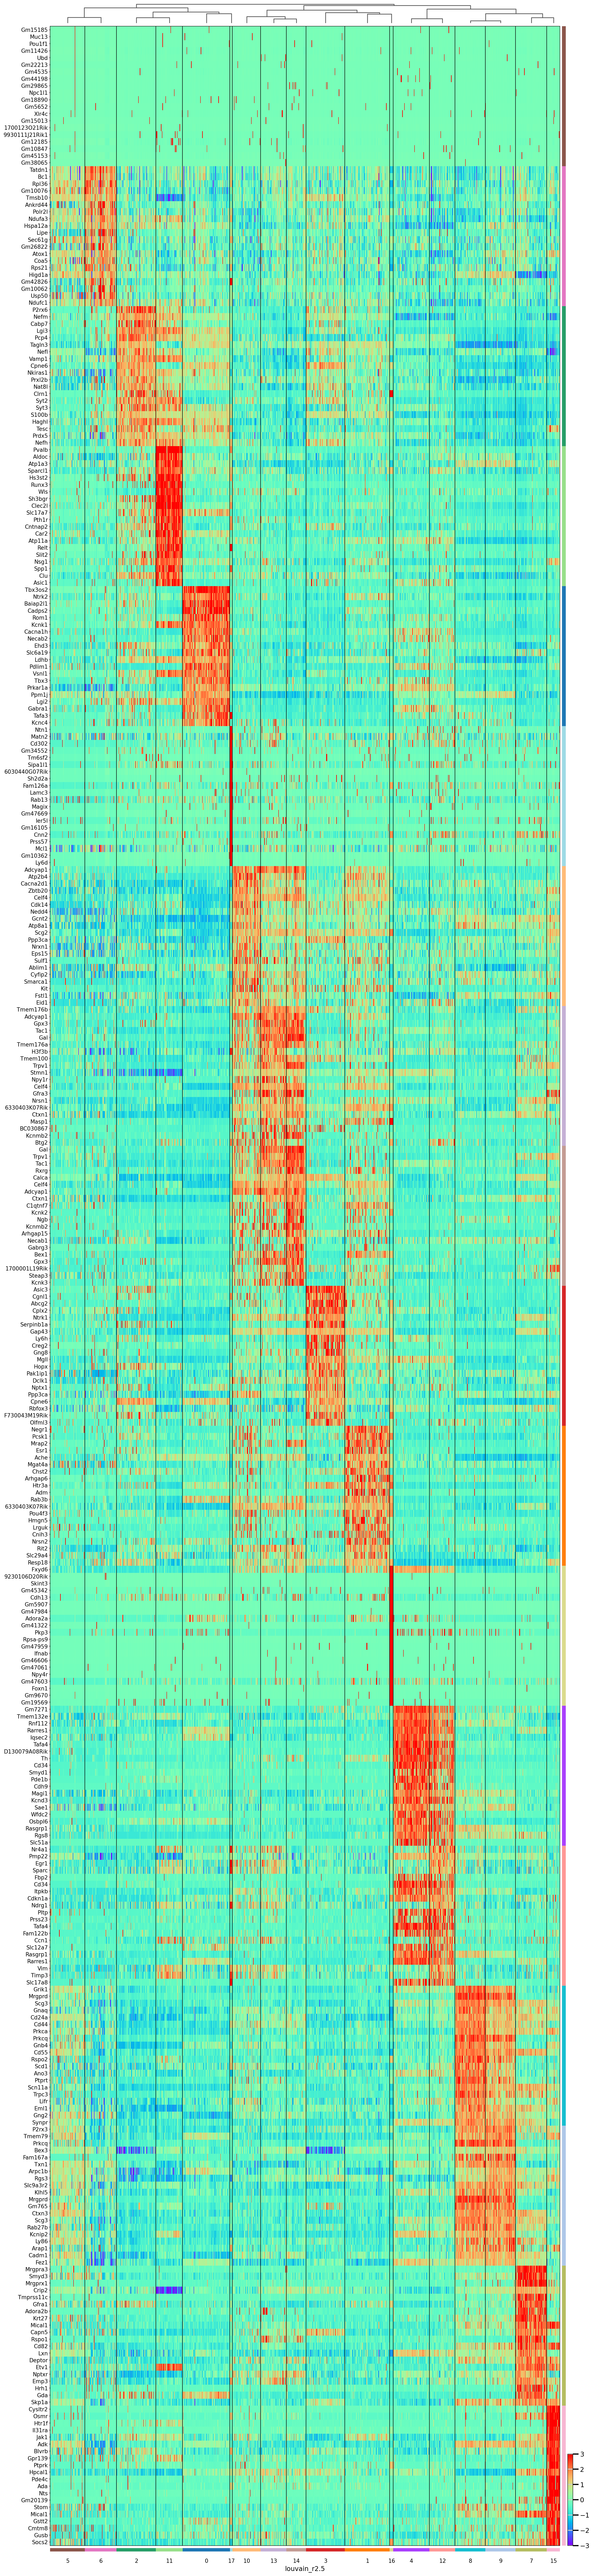

In [37]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=20, use_raw=False, show_gene_labels=True,swap_axes=True, vmin=-3, vmax=3, cmap='rainbow', figsize=(20,100), show=True, 
                               save = 'UMIs/characteristic_genes/'+'characteristic_genes_5_louvain_r2.5' + '.png', dendrogram = True)

#sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False,
#                                vmin=-3, vmax=3, cmap='bwr')


In [38]:
!pip install hdf5plugin
import hdf5plugin

adata.write_h5ad(
    os.path.join(input_path , 'campari_scs_umap.h5ad'),
#    compression=hdf5plugin.FILTERS["zstd"],
#    compression_opts=hdf5plugin.Zstd(clevel=5).filter_options
)

categories: 0, 1, 2, etc.
var_group_labels: RA-LTMR, C-LTMR, Itch, etc.


/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:1067: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if isinstance(groupby, str) and is_categorical_dtype(adata.obs[groupby]):


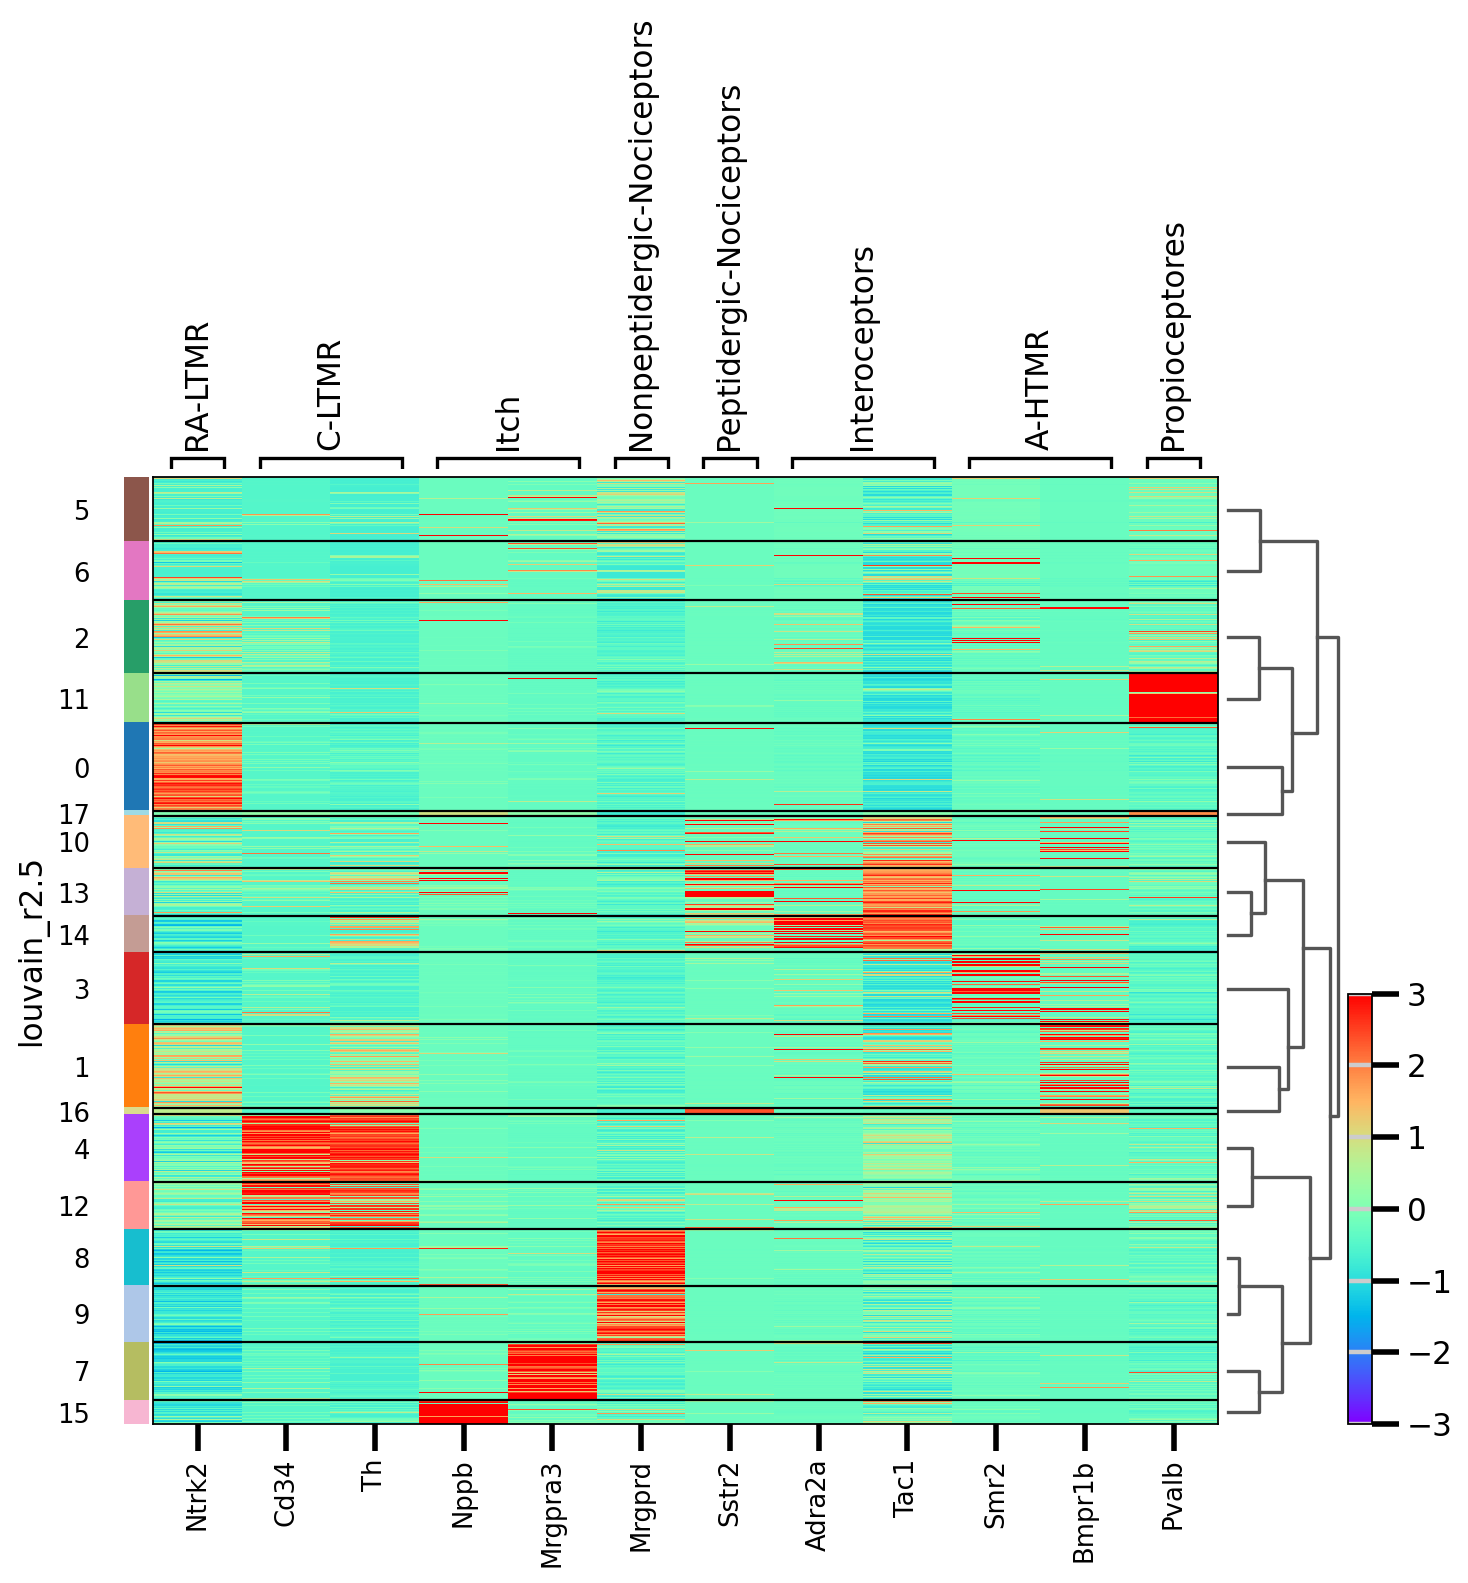

In [39]:
marker_genes_dict = {
    'RA-LTMR': ['Ntrk2'],
    'C-LTMR': ['Cd34', 'Th'],
    'Itch': ['Nppb','Mrgpra3'],
    'Nonpeptidergic-Nociceptors': ['Mrgprd'],
    'Peptidergic-Nociceptors': ['Sstr2'],
    'Interoceptors': ['Adra2a','Tac1'],
    'A-HTMR': ['Smr2','Bmpr1b'],
    'Propioceptores': ['Pvalb']
}

sc.pl.heatmap(adata, marker_genes_dict, groupby='louvain_r2.5', cmap='rainbow',figsize=(10,8), 
              show=True,show_gene_labels=True, dendrogram = True,vmin=-3,vmax=3,
                               save = 'UMIs/characteristic_genes/'+'marker_genes_dict_louvain_r1' + '.png')


## SECTION III: Genes exploration 

Here we explore the expression of relevant genes for the experiment. We use the umap projection created in section III and visualize the expresssion of interesting genes. 

In [40]:
### Define list of relevant genes 

marker_genes = ['Trpm3','Piezo2','Trpm2','Smr2','Sstr2','Bmpr1b','Trpm8','Trpv1','Piezo2','Piezo1','Nppb',
                'Sst','Pvalb','Prokr2','Mrgprd','Mrgpra3','Cd34',
                'Th','Trpa1','Ntrk3','Ntrk2','Ntrk1','Ret','Tac1','Calca','Calcb','Nefh',
                'S100b','Scn10a','Slc17a8','Atf3','Pou4f3','Calb1','Calb2','Avil','Asic3',
                'Asic2','Asic1','Pou6f2','Avpr1a','Pou4f2','Sox10','Casq2','Chrna7','Chrna3',
                'P2rx3','Ldhb','Necab2','Spp1','Adm','Hpse','Adra2a']
#marker_genes = ['Adra2a']


In [ ]:
### Run plotting umap with color code according to gene expression
rcParams['figure.figsize']=(4,4)

np.in1d(marker_genes, adata.var_names)
for gene in marker_genes:
    sc.pl.umap(adata=adata, color=gene, use_raw=False, cmap = 'rainbow',save = 'UMIs/expression/genes_' + gene + '.png', size = 80)

/home/melma31/mambaforge/lib/python3.10/site-packages/scanpy/plotting/_anndata.py:1067: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if isinstance(groupby, str) and is_categorical_dtype(adata.obs[groupby]):


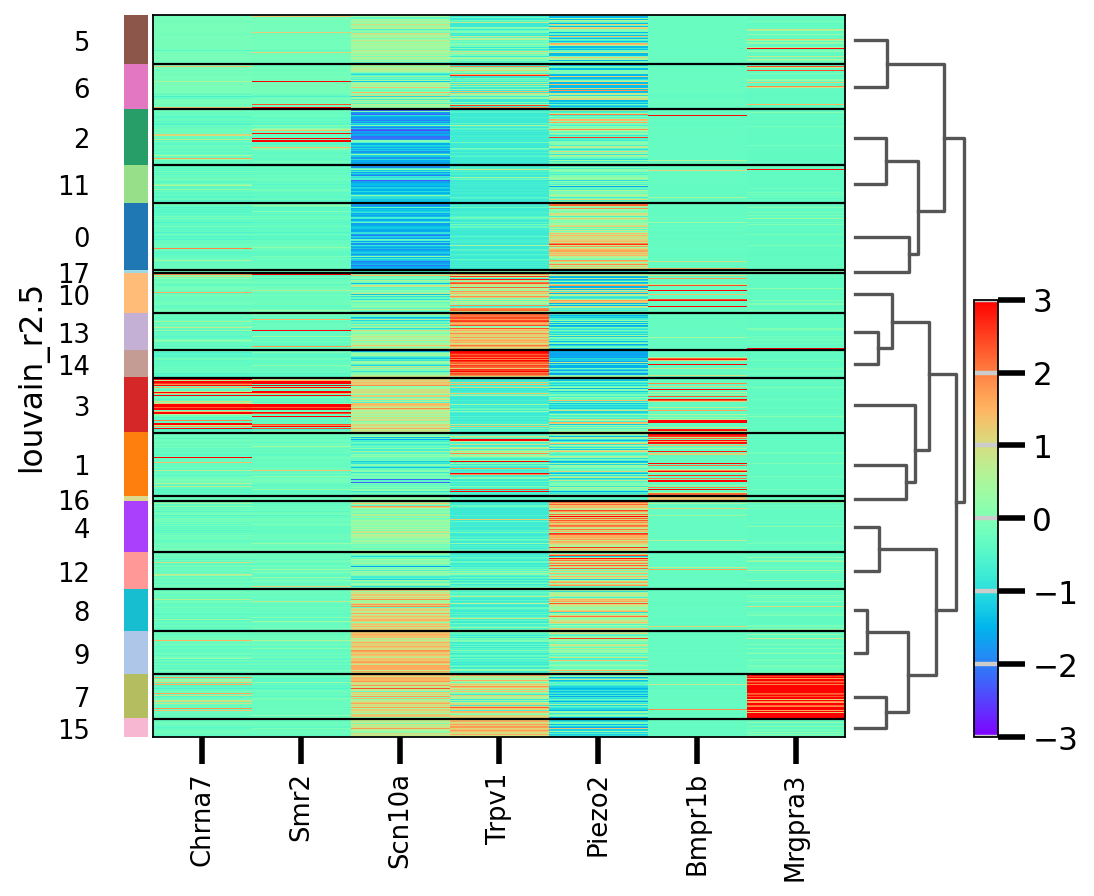

In [41]:
marker_genes = ['Chrna7','Smr2','Scn10a','Trpv1','Piezo2','Bmpr1b','Mrgpra3']
sc.pl.heatmap(adata, marker_genes, groupby='louvain_r2.5', cmap='rainbow',figsize=(7,6),vmin=-3,vmax=3, show=True,show_gene_labels=True, 
                               save = 'UMIs/characteristic_genes/'+'marker_genes_3_louvain_r2.5' + '.png', dendrogram = True)

#sc.pl.rank_genes_groups_heatmap(adata, n_genes=10, use_raw=False, swap_axes=True, show_gene_labels=False,
#                                vmin=-3, vmax=3, cmap='bwr')


## EXPORT DATA FOR MATLAB

Now we add the information we have about stimuli for each cell and level of campari green and red fluorecence. 

Here we define the stimuli that were used (this assignation of number and id is the one that is used in the plate information excel sheet): 


* 0: control
* 1: pinch
* 2: new_stroke (after december)
* 3: ballon
* 4: AG (ano-genital brush)
* 5: AD (anal distension)
* 6: heating
* 7: mock
* 8: old_stoke (first experiments with stroke)
* 9: anal pinch
* 10: mock with poop
* 11: tomatoe
* 12: poop

In [46]:
#################################################################################
#################################################################################
#################################################################################
#################### HERE WE EXPORT ALL THE INFORMATION AS .MAT ################

### we export sparse data matrix, stimuli and flourecence information, umap transformation information and
### louvain transformation

### create and exportable varable list of genes names
gene_name = []
for i in range(len(adata.var['gene_name'])):
    gene_name.append(adata.var['gene_name'].iloc[i])
    
gene_name_all = []
for i in range(len(adata_all.var['gene_name'])):
    gene_name_all.append(adata_all.var['gene_name'].iloc[i])
### transform adata sparse matrix to scipy
x_all = scipy.sparse.csr_matrix.toarray(adata_all.X)
x = adata.X
### create exportable arrays with information about stimuli, fluorecence, and louvain transformations
stim = np.zeros((x.shape[0],))
red = np.zeros((x.shape[0],))
green = np.zeros((x.shape[0],))
cell_id = np.zeros((x.shape[0],))

louvain = np.zeros((x.shape[0],len(louvain_names)))
for i in range(x.shape[0]):
    stim[i] = adata.obs['stimulus'][i]
    red[i] = adata.obs['red'][i]
    green[i] = adata.obs['green'][i]
    cell_id[i] = adata.obs['cell_id'][i]

    count = 0
    for name in louvain_names:
        louvain[i,count] = adata.obs[name][i]
        count = count + 1
data = {'umap': adata.obsm['X_umap'],'gene_name' : np.array(gene_name_all),'gene_name_matrix' : np.array(gene_name),
        'sparse_matrix': x_all,'matrix': x,'stimuli':stim,
        'red_intesity': red, 'green_intensity': green, 'louvain' : louvain, 'louvain_name': louvain_names, 'cell_id': cell_id}

scipy.io.savemat(os.path.join(input_path , 'umap_date_'+str(today)+'.mat'), data) ### os.join path  + time so no manual!

#################################################################################
#################################################################################
#################################################################################

/tmp/ipykernel_172727/4145054918.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  stim[i] = adata.obs['stimulus'][i]
/tmp/ipykernel_172727/4145054918.py:29: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  red[i] = adata.obs['red'][i]
/tmp/ipykernel_172727/4145054918.py:30: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  green[i] = adata.obs['green'][i]
/tmp/ipykernel_172727/4145054918.py:31: FutureWarning: Series.__getitem__ treatin

## SECTION IV: PCA and Clusteting robustness exploration

In [ ]:
# we reload the original data before pca and umap
adata = ad.read_h5ad(os.path.join(input_path + 'campari_scs.h5ad'))

def unique(list1):
 
    # initialize a null list
    unique_list = []
    unique_index = []
 
    # traverse for all elements
    count = 0
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
            unique_index.append(count)
        count+=1
    return unique_list,unique_index
        
print(adata.shape)
gene_name = []
for i in range(len(adata.var['gene_name'])):
    gene_name.append(adata.var['gene_name'].iloc[i])

unique_genes , unique_genes_index = unique(gene_name)

adata = adata[:,np.array(unique_genes_index)]

### Test 1: Campari vs Control

We split the cells between campari and control cells, and visually check clusters. 

Clusters will be different, but we will check gene expression patters. 

First we can check the expression of genes that we already know we are interested in to verify if in both set of data they clusterized.

Second we run clustering algorithms in each separate dataset, we look for characteristics genes. With the characteristic genes of dataset1 we check the expression partten in the clusters obtein in dataset2 (an viceversa). The idea of this is to visually check if the genes that are relevant for clustering in one dataset are have also a clusterized expression pattern in the other dataset. 

I NEED TO THINK ABOUT QUANTIFICATION OF THIS PROCEDURE!!!!!

In [ ]:
### We split the cels between campari and control cells

campari_cells = np.where(stim != 0)[0]
control_cells = np.where(stim == 0)[0]

print('Number of campari cells = ', len(campari_cells))
print('Number of control cells = ', len(control_cells))

adata_campari = adata[campari_cells,:]
adata_control = adata[control_cells,:]

### Dimentionality reduction examples using multiple techniques
### Select one number of componets, for example n = 15 and do louvain in the umap transformation 
# with that number of componets (we use the same number of components that was previously selected)
N_selected = 15
sc.pp.pca(adata_campari, n_comps=N_selected, use_highly_variable=True, svd_solver='arpack')
sc.pp.pca(adata_control, n_comps=N_selected, use_highly_variable=True, svd_solver='arpack')

#rcParams['figure.figsize']=(4,4)
#sc.pl.pca_variance_ratio(adata_campari)
#sc.pl.pca_variance_ratio(adata_control)

In [ ]:
### run the standard umap and clustering analysis in both datasets

sc.pp.neighbors(adata_campari)
sc.tl.umap(adata_campari)

sc.pp.neighbors(adata_control)
sc.tl.umap(adata_control)

louvain_paramenters = [2,2.5,3]
louvain_names = []
for value in louvain_paramenters:
    louvain_names.append('louvain_r' + str(value))

for value,name in zip(louvain_paramenters,louvain_names):
    sc.tl.louvain(adata_campari, resolution=value, key_added=name)
    sc.tl.louvain(adata_control, resolution=value, key_added=name)
   

In [ ]:
### Plotting multiple louvain clustering in campari vs control just for visual inspection!
### scatter plots from this are expected to be different!

rcParams['figure.figsize']=(20,10)
fig_ind=np.arange(231, 237)
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p10 = sc.pl.pca_scatter(adata_campari, color='n_counts', ax=fig.add_subplot(fig_ind[0]), show=False)
p12 = sc.pl.umap(adata_campari, color='n_counts', ax=fig.add_subplot(fig_ind[1]), show=False)
p13 = sc.pl.umap(adata_campari, color=louvain_names[1], ax=fig.add_subplot(fig_ind[2]), show = False)

p20 = sc.pl.pca_scatter(adata_control, color='n_counts', ax=fig.add_subplot(fig_ind[3]), show=False)
p22 = sc.pl.umap(adata_control, color='n_counts', ax=fig.add_subplot(fig_ind[4]), show=False)
p23 = sc.pl.umap(adata_control, color=louvain_names[1], ax=fig.add_subplot(fig_ind[5]), show = False)

fig.savefig(os.path_join(figure_path , 'clustering/control_vs_campari_png'))
plt.show()

In [ ]:
### Define list of relevant genes and check expression in control and campari dataset to verify if they clusterize similarly

marker_genes_test = ['Adra2a','Trpm2','Smr2','Sstr2','Bmpr1b','Nppb',
                'Pvalb','Mrgprd','Mrgpra3','Cd34',
                'Th','Ntrk2','Tac1']

### Run plotting umap with color code according to gene expression
rcParams['figure.figsize']=(12,3)

np.in1d(marker_genes_test, adata_control.var_names)
n_markers = len(marker_genes_test)
for gene in marker_genes_test:
    
    fig = plt.figure()
    fig_ind=np.arange(121, 123)
    fig.subplots_adjust(hspace=0.4, wspace=0.6)

    p10 = sc.pl.umap(adata_campari,color=gene, use_raw=False, cmap = 'rainbow', ax=fig.add_subplot(fig_ind[0]), size = 80, show = False)
    p11 = sc.pl.umap(adata_control,color=gene, use_raw=False, cmap = 'rainbow', ax=fig.add_subplot(fig_ind[1]), size = 80, show = False)

    p10.set_title('Campari ' + gene)
    p11.set_title('Contol ' + gene)
    fig.savefig(os.path.join(figure_path , 'clustering/expression_genes_control_vs_campari_'+ '_louvain_r2.5_'+gene+'.png'))
    plt.show()
    

In [ ]:
### run characteristic genes ranking using louvain clustering as a grouping criteria. 

sc.tl.rank_genes_groups(adata_campari, 'louvain_r2.5', method='wilcoxon')
# to visualize the results
#sc.pl.rank_genes_groups(adata_campari)
sc.tl.rank_genes_groups(adata_control, 'louvain_r2.5', method='wilcoxon')

### create a data frame vos visualization of relevant genes with N number of genes. 
rank_genes_control_df = pd.DataFrame(adata_control.uns['rank_genes_groups']['names']).head(15)
rank_genes_campari_df = pd.DataFrame(adata_campari.uns['rank_genes_groups']['names']).head(15)

In [ ]:
### cross datasets plotting test!

for i in range(15):
    marker_genes_control = []
    for j in range(15):
        marker_genes_control.append(adata_control.uns['rank_genes_groups']['names'][j][i])
    sc.pl.heatmap(adata_campari, marker_genes_control, groupby='louvain_r2.5', cmap='rainbow',
                  vmin = -3, vmax = 3, figsize=(5,4),
                  show=True,show_gene_labels=True,  dendrogram = True,
                save = 'UMIs/characteristic_genes/'+'marker_genes_control_'+str(i)+'_louvain_r2.5' + '.png')




### Test 2 a: Learning clustering in subset of data

Visual inspection of random sample robustness. Here we run a similar proceduce to campari vs control cells, but in random selections of 80% (or different of the data). We compare expression patterns in 3 different subsample random selection of cells, and we compare the characteristic genes that emerge from clustering one data set in another dataset. 

In [ ]:
rcParams['figure.figsize']=(4,4)

labels=['Control','pinch','new_stroke','ballon','AG','AD','heating','mock','old_stroke','anal_pinch','mock_w_poop','vaginal_distension','tomatoe','poop']
color = ['gainsboro','green','darkorange','purple','magenta','cyan','red','orange','yellow','brown','orange','blue','violet','k']

### create and exportable varable list of genes names
gene_name = []
for i in range(len(adata.var['gene_name'])):
    gene_name.app

In [ ]:
# Perform clustering - using highly variable genes
louvain_names = []
for value in louvain_paramenters:
    louvain_names.append('louvain_r' + str(value))

rcParams['figure.figsize']=(15,3)
### first we do a visual test using scanpy subsample tool

sample = np.random.randint(low=0, high=adata.shape[0], size=int(adata.shape[0]*fraction), dtype=int)
adata1 = adata[sample,:]
sc.pp.pca(adata1, n_comps=N_selected, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata1)
sc.tl.tsne(adata1)
sc.tl.umap(adata1)
sc.tl.louvain(adata1, resolution=2, key_added='louvain_r2')
    
sample = np.random.randint(low=0, high=adata.shape[0], size=int(adata.shape[0]*fraction), dtype=int)
adata2 = adata[sample,:]
sc.pp.pca(adata2, n_comps=N_selected, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata2)
sc.tl.tsne(adata2)
sc.tl.umap(adata2)
sc.tl.louvain(adata2, resolution=2, key_added='louvain_r2')
   
sample = np.random.randint(low=0, high=adata.shape[0], size=int(adata.shape[0]*fraction), dtype=int)
adata3 = adata[sample,:]
sc.pp.pca(adata3, n_comps=N_selected, use_highly_variable=True, svd_solver='arpack')
sc.pp.neighbors(adata3)
sc.tl.tsne(adata3)
sc.tl.umap(adata3)
sc.tl.louvain(adata3, resolution=2, key_added='louvain_r2')
 
 

In [ ]:
fig = plt.figure()
fig_ind=np.arange(131, 134)
fig.subplots_adjust(hspace=0.4, wspace=0.6)

p10 = sc.pl.umap(adata1, color='louvain_r2', ax=fig.add_subplot(fig_ind[0]), size = 80, show = False)
p11 = sc.pl.umap(adata2, color='louvain_r2', ax=fig.add_subplot(fig_ind[1]), size = 80, show = False)
p12 = sc.pl.umap(adata3, color='louvain_r2', ax=fig.add_subplot(fig_ind[2]), size = 80, show = False)

fig.savefig(os.path.join(figure_path , 'clustering/downsample_'+str(fraction)+ '_louvain_r2.5.png'))
plt.show()

In [ ]:
### Define list of relevant genes 

marker_genes_test = ['Trpm2','Smr2','Sstr2','Bmpr1b','Nppb',
                'Pvalb','Mrgprd','Mrgpra3','Cd34',
                'Th','Ntrk2','Tac1']

### Run plotting umap with color code according to gene expression
rcParams['figure.figsize']=(12,3)

np.in1d(marker_genes_test, adata1.var_names)

for gene in marker_genes_test:
    
    fig = plt.figure()
    fig_ind=np.arange(131, 134)
    fig.subplots_adjust(hspace=0.4, wspace=0.6)

    p10 = sc.pl.umap(adata1,color=gene, use_raw=False, cmap = 'rainbow', ax=fig.add_subplot(fig_ind[0]), size = 80, show = False)
    p11 = sc.pl.umap(adata2,color=gene, use_raw=False, cmap = 'rainbow', ax=fig.add_subplot(fig_ind[1]), size = 80, show = False)
    p12 = sc.pl.umap(adata3,color=gene, use_raw=False, cmap = 'rainbow', ax=fig.add_subplot(fig_ind[2]), size = 80, show = False)

    fig.savefig(figure_path + 'clustering/expression_genes_downsample_'+str(fraction)+ '_louvain_r2_'+gene+'.png')
    plt.show()
    

In [ ]:
sc.tl.rank_genes_groups(adata1, 'louvain_r2', method='wilcoxon')
sc.tl.rank_genes_groups(adata2, 'louvain_r2', method='wilcoxon')
sc.tl.rank_genes_groups(adata3, 'louvain_r2', method='wilcoxon')

In [ ]:
rank_genes_1_df = pd.DataFrame(adata1.uns['rank_genes_groups']['names']).head(10)
rank_genes_2_df = pd.DataFrame(adata2.uns['rank_genes_groups']['names']).head(10)
rank_genes_3_df = pd.DataFrame(adata3.uns['rank_genes_groups']['names']).head(10)


In [ ]:
for i in range(10):
    
    marker_genes1 = []
    for j in range(10):
        marker_genes1.append(adata1.uns['rank_genes_groups']['names'][j][i])
    sc.pl.heatmap(adata2, marker_genes1, groupby='louvain_r2',cmap='rainbow',
                  vmin = -3, vmax = 3, figsize=(5,4),
                  show=True,show_gene_labels=True,  dendrogram = True,
                  save = 'UMIs/characteristic_genes/'+'marker_genes_random_'+str(i)+'_louvain_r2' + '_random0.6.png')

In [ ]:
# Perform clustering - using highly variable genes
louvain_paramenters = 2

rcParams['figure.figsize']=(25,10)
### first we do a visual test using scanpy subsample tool

marker_genes_test = ['Trpm2','Smr2','Sstr2','Bmpr1b','Nppb',
                'Pvalb','Mrgprd','Mrgpra3','Cd34',
                'Th','Ntrk2','Tac1','Calca','Chrna7','Adm']

fig = plt.figure()
fig_ind=np.arange(251, 2510)
fig.subplots_adjust(hspace=0.4, wspace=0.6)
for gene in marker_genes_test:
    fig2 = plt.figure()
    fig_ind=np.arange(251, 2510)
    fig2.subplots_adjust(hspace=0.4, wspace=0.6)

    for i in range(2,11):
        fraction = 0.1 * i
        sample = np.random.randint(low=0, high=adata.shape[0], size=int(adata.shape[0]*fraction), dtype=int)
        adata1 = adata[sample,:]
        sc.pp.pca(adata1, n_comps=N_selected, use_highly_variable=True, svd_solver='arpack')
        sc.pp.neighbors(adata1)
        sc.tl.tsne(adata1)
        sc.tl.umap(adata1)
        sc.tl.louvain(adata1, resolution=louvain_paramenters, key_added='louvain_r2')

        p10 = sc.pl.umap(adata1, color='louvain_r2', ax=fig.add_subplot(fig_ind[i-2]), size = 80, show = False)
        p12 = sc.pl.umap(adata1,color=gene, use_raw=False, cmap = 'rainbow', ax=fig2.add_subplot(fig_ind[i-2]), size = 80, show = False)


    fig.savefig(os.path.join(figure_path , 'clustering/downsample_experiement_'+'louvain_r2'+ '.png'))
    plt.show()
    fig2.savefig(os.path.joib(figure_path , 'clustering/downsample_experiement_'+gene+ '.png'))


### Test 2 b: Learning clustering in subset of data

The test I was thinking for robustness is something like this: You take 100% of the data and run clustering. Then you take a portion (lets say 80%) of the data and do it ML style (meaning you do not only do the projection but you learn the transformation). Then you take the 20% left out, you use the learn transformation to check in which cluster they would fall. Testing robustness will be something like how much that 20% of the data goes into the same clusters as they will go if you would have done the clustering with 100%. It is a little tricky because there is not guaranty that with 80% of the data you will have exactly the same clusters as with 100%...but I am sure there is some way of doing this measure in this direction

In [ ]:
# we reload the original data before pca and umap
adata = ad.read_h5ad(os.path.join(input_path + 'campari_scs_umap.h5ad'))

In [ ]:
### this code has been taken from the scanpy.umap function. the idea here is that, as we will usedirectly umap library
#we want to reproduce exactly the same results that we have obteined with scanpy, for that we copy paramenters 
# from scanpy umap, and then will use standard umap library to make our test.
# This is because scanpy does not allow us to 

from scanpy._utils import NeighborsView
neighbors_key = 'neighbors'
neighbors = NeighborsView(adata, neighbors_key)
if 'params' not in neighbors or neighbors['params']['method'] != 'umap':
        logg.warning(
            f'.obsp["{neighbors["connectivities_key"]}"] have not been computed using umap'
        )
n_neighbors = neighbors['params']['n_neighbors']

In [ ]:
### create a umap embedding in the genes x genes space
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

#scaled_data = StandardScaler().fit_transform(adata.X)
#scaled_data = (scaled_data - np.min(scaled_data, axis = 0))/ (np.max(scaled_data, axis = 0).reshape(-1) - np.min(scaled_data, axis = 0).reshape(-1))
scaled_data = adata.X
pca1 = PCA(N_selected)
pca1.fit(scaled_data)
pca_embedding = pca1.transform(scaled_data)

reducer = umap.UMAP(n_components= 2,n_neighbors=n_neighbors,min_dist = 0.5,spread= 1.0, init= 'spectral', negative_sample_rate=5,
                    random_state= 0,verbose=sc.settings.verbosity > 3)
umap_embedding = reducer.fit_transform(pca_embedding)

In [ ]:
rcParams['figure.figsize']=(4,4)
figure, axes = plt.subplots(1,1)
expression_count = np.sum(adata.X,axis = 1)
axes.scatter(umap_embedding[:,0],umap_embedding[:,1], s= 3,alpha = 1,c = expression_count, cmap = 'rainbow')

In [ ]:
### Run plotting umap with color code according to gene expression
rcParams['figure.figsize']=(5,4)

np.in1d(marker_genes, adata.var_names)
for marker in marker_genes:
    figure, axes = plt.subplots(1,1)
    index = gene_name.index(marker)
    expression_count = adata.X[:,index]
    sc = axes.scatter(umap_embedding[:,0],umap_embedding[:,1], s= 3,alpha = 1,c = expression_count, cmap = 'rainbow')
    axes.set_title(marker)
    axes.grid(False)
    figure.colorbar(sc)
    figure.set_size_inches([3,3])
    figure.savefig(figure_path + 'genes_manual_umap_'+marker+'.png')
    plt.close()

In [ ]:
rcParams['figure.figsize']=(15,15)

labels=['Control','pinch','new_stroke','ballon','AG','AD','heating','mock','old_stroke','anal_pinch','mock_w_poop','vaginal_distension','tomatoe','poop']
color = ['gainsboro','green','darkorange','purple','magenta','cyan','red','orange','yellow','brown','orange','blue','violet','k']

### create and exportable varable list of genes names
gene_name = []
for i in range(len(adata.var['gene_name'])):
    gene_name.append(adata.var['gene_name'].iloc[i])
### transform adata sparse matrix to scipy
x = adata.X
### create exportable arrays with information about stimuli, fluorecence, and louvain transformations
stim = np.zeros((x.shape[0],))
red = np.zeros((x.shape[0],))
green = np.zeros((x.shape[0],))
for i in range(x.shape[0]):
    stim[i] = adata.obs['stimulus'][i]
    red[i] = adata.obs['red'][i]
    green[i] = adata.obs['green'][i]
    
figure, axes = plt.subplots()
#red_norm = (red - np.min(red)) / (np.max(red) - np.min(red))
for i in range(len(labels)):
    index = np.where(stim == i)[0]
    red_norm = (red[index] - np.min(red[index])) / (np.max(red[index]) - np.min(red[index]) + sys.float_info.epsilon)
    red_norm = (red_norm + 0.1)/1.1
    axes.scatter(umap_embedding[index,0],umap_embedding[index,1], s = 50, c = color[i], alpha = red_norm)
axes.grid(visible = 'None')
#axes.set_xlim([0,19])
#axes.set_ylim([0,19])
axes.set_xlabel('UMAP1', fontsize = 20)
axes.set_ylabel('UMAP2', fontsize = 20)
axes.tick_params(axis='both', which='major', labelsize=12)
axes.tick_params(axis='both', which='minor', labelsize=12)
axes.grid(False)

#axes.legend(labels, fontsize = 12)
figure.set_size_inches([3,3])
figure.savefig(figure_path + 'stimulus_manual_umap.png')

rcParams['figure.figsize']=(15,15)
for i in range(1,14):
    figure, axes = plt.subplots(1,1)
    index_control = np.where(adata.obs['stimulus'] == 0)[0]
    index_stim = np.where(adata.obs['stimulus'] == i)[0]    
    axes.scatter(umap_embedding[index_control,0],umap_embedding[index_control,1], s= 3,alpha = 1,c = 'grey')
    axes.scatter(umap_embedding[index_stim,0],umap_embedding[index_stim,1], s= 3,alpha = 1,c = 'b')
    axes.set_title(labels[i])
    figure.set_size_inches([3,3])
    figure.savefig(figure_path + 'stimulus_manual_umap_'+labels[i]+'.png')
    plt.close()

In [ ]:
!pip install scikit-network
from sknetwork.clustering import Louvain

louvain = Louvain()
labels = louvain.fit_predict(adjacency)


### Test 3: Testing performance with 'not so deep data'

This means reducing reads per gene. First we will just reduce number of reads and compare visually umap representation, clustering, expression of relevant genes, and characteristic genes in clusters as we did before. 


!!!!! Change multiple depths to see which genes will apper with different levels!!!! 

Go to campari_scs_III_counts_downsampling.ipynb